# Writing a simple model 

## Part 1: Simple model development

### Objective: Read model input files, calculate output over model domain, write model output files

This model is based on Example 6.2 of Bedient et. al (1999):  

*A tank holding chloride at a concentration of 10,000 mg/L accidentally leaks over an area of 10 m$^{2}$ into an aquifer.  Assume the chloride is a completely conservative tracer, that $D_{x}$ = 1 m$^{2}$/day and $D_{y}$ = 0.1 m$^{2}$/day, and that the seepage velocity ($V_{w}$) is 1 m/day.*

For our model, we're going to define a domain of 5-100 m from the leak at 5 m intervals.  For each interval in our domain we will calculate:

* a) The time required to reach the interval node
$$t = \frac{R_{t}x}{V_{w}}$$ 

where $R_{t}$ is the retardation with time, $x$ is the distance from leak source, and $V_{w}$ is the seepage velocity.
* b) Peak concentration
$$C_{max} = \frac{C_{0}A}{4t\pi(D_{x}D_{y})^{1/2}}$$

where $C_{0}$ is the initial chloride concentration, $A$ is the spill area, $t$ is the time for the plume to reach the interval node, and $D_{x}$ and $D_{y}$ are the dispersion cefficients in the $x$ and $y$ directions, respectively.
* c) Plume Dimensions
$$3\sigma_{x} = 3(2D_{x}t)^{1/2}$$
$$3\sigma_{y} = 3(2D_{y}t)^{1/2}$$

where $3\sigma_{x}$ and $3\sigma_{y}$ are the plume dimensions in the $x$ and $y$ directions within three standard deviations from the mean (99.7% containment), respectively.

**Implementation algorithm:**
1. Define functions to calculate equations for parts a, b, and c.
2. Read in input parameters from *pulse2D_input.txt* and define input variables
4. Define model domain and interval size
5. Define vectors to store output data
6. Write for loop to iterate over model domain
7. Apply functions for a, b, and c for each interation and store values
9. Write output file
8. Plot data

**References**
Bedient, P.B., Rifai, H.S., and Newell, C.J. (1999).  Ground water contamination: Transport and remediation (2nd edition).  ISBN: 0-13-013840-1.

In [1]:
# IMPORT PACKAGES
import math  # functions like sqrt and pi are parth of the math package
import re  # regular expressions
import numpy as np  # linearly spaced vector

# plotting
from matplotlib import rcParams  # next 3 lines set font family for plotting
rcParams['font.family'] = ['serif']
rcParams['font.sans-serif'] = ['Optima']
rcParams['font.serif'] = ['Didot']
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
# STEP 1: FUNCTIONS
# custom functions always go at the very type of your code - you can't use them until you run them!

# PART A:
def time2node(x,Rt,Vw):
    t = (Rt*x)/Vw
    return t

# PART B:
def peakC(t,C0,A,Dx,Dy):
    Cmax = (C0*A)/(4*t*math.pi*math.sqrt(Dx*Dy))
    return Cmax

# PART C:
def plumeDim(t,D):
    sigma3 = 3*math.sqrt(2*D*t)
    return sigma3

In [3]:
# STEP 2: Read in input parameters from *pulse2D_input.txt* and define input variables
header_str = '^#'  # character to define header string in input file
#var_strs = ['Dx','Dy','Vw','C0','A','Rt']  # variable names to search for

# initialize variables - variables created within a for loop won't exist after the final iteration.  always preallocate space for variables and arrays (this also saves processing time)
Dx = 0
Dy = 0
Vw = 0
C0 = 0
A = 0
Rt = 0

f = open('pulse2D_input.txt')
print('LINES----------')
for line in f.readlines():
    header = re.search(header_str,line)
    if header is None:
        lst = re.split('\t',line)
        print(lst)
        Dx_re = re.search('^Dx',line)
        Dy_re = re.search('^Dy',line)
        Vw_re = re.search('^Vw',line)
        C0_re = re.search('^C0',line)
        A_re = re.search('^A',line)
        Rt_re = re.search('^Rt',line)
        
        if Dx_re is not None:
            Dx = float(lst[1])
        if Dy_re is not None:
            Dy = float(lst[1])
        if Vw_re is not None:
            Vw = float(lst[1])
        if C0_re is not None:
            C0 = float(lst[1])
        if A_re is not None:
            A = float(lst[1])
        if Rt_re is not None:
            Rt = float(lst[1])


f.close()
print('\nVARIABLES---------')
print(Dx)
print(Dy)
print(Vw)
print(C0)
print(A)
print(Rt)

# STEP 3: Define model domain and interval size
h = 5
domain = np.linspace(5,100,20)
print('\nDOMAIN NODES----------')
print(domain)

LINES----------
['PARAMETER', 'VALUE\n']
['Dx', '1.000000\n']
['Dy', '.1000000\n']
['Vw', '1.000000\n']
['C0', '10000.00\n']
['A', '10.00000\n']
['Rt', '1.000000\n']

VARIABLES---------
1.0
0.1
1.0
10000.0
10.0
1.0

DOMAIN NODES----------
[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100.]


In [4]:
# STEP 4: Define vectors to store output data
t_out = []
Cmax_out = []
sigma3x_out = []
sigma3y_out = []

# STEP 5: Write for loop to iterate over model domain
for x in domain:
    
    # STEP 6: Apply functions for a, b, and c for each interation and store values
    t = time2node(x,Rt,Vw)  # calculate value
    t_out.append(t)  # store value
    Cmax = peakC(t,C0,A,Dx,Dy)
    Cmax_out.append(Cmax)
    sigma3x = plumeDim(t,Dx)
    sigma3x_out.append(sigma3x)
    sigma3y = plumeDim(t,Dy)
    sigma3y_out.append(sigma3y)
    
print('OUTPUT: t')
print(t_out)
print('\nOUTPUT: Cmax')
print(Cmax_out)
print('\nPLUME DIMENSIONS:----')
print('\nsigma3x')
print(sigma3x_out)
print('\nsigma3y')
print(sigma3y_out)

OUTPUT: t
[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]

OUTPUT: Cmax
[5032.921210448703, 2516.4606052243516, 1677.6404034829013, 1258.2303026121758, 1006.5842420897407, 838.8202017414507, 718.9887443498149, 629.1151513060879, 559.2134678276336, 503.2921210448703, 457.538291858973, 419.41010087072533, 387.1477854191311, 359.4943721749074, 335.5280806965802, 314.55757565304395, 296.0541888499237, 279.6067339138168, 264.89059002361597, 251.64606052243516]

PLUME DIMENSIONS:----

sigma3x
[9.486832980505138, 13.416407864998739, 16.431676725154983, 18.973665961010276, 21.213203435596427, 23.237900077244504, 25.099800796022265, 26.832815729997478, 28.460498941515414, 30.0, 31.464265445104544, 32.863353450309965, 34.205262752974136, 35.4964786985977, 36.742346141747674, 37.94733192202055, 39.1152144312159, 40.24922359499622, 41.352146256270665, 42.42640687119285]

sigma3y
[3.0, 4.242640687119286, 5.196152422706632, 6.0

In [5]:
# STEP 9: write output file
f_out = open('pulse2D_output.txt','w')
#f_out.write('t\tCmax\tsigma3x\tsigma3y\n')
f_out.write('{:12}'.format('t')+'\t' \
            +'{:12}'.format('Cmax')+'\t' \
            +'{:12}'.format('sigma3x')+'\t' \
            +'{:12}'.format('sigma3y')+'\n')
for i in range(len(domain)):
    # convert all numbers to floats with 14 sig fig 
    t = '{:04.10f}'.format(t_out[i])
    Cmax = '{:04.10f}'.format(Cmax_out[i])
    sigma3x = '{:04.10f}'.format(sigma3x_out[i])
    sigma3y = '{:04.10f}'.format(sigma3y_out[i])
    
    # convert to string for writing, format string width to 12 characters so that cols are of even width
    t = '{:.12}'.format(str(t))
    Cmax = '{:.12}'.format(str(Cmax))
    sigma3x = '{:.12}'.format(str(sigma3x))
    sigma3y = '{:.12}'.format(str(sigma3y))
    strng = t + '\t' + Cmax + '\t' + sigma3x + '\t' + sigma3y + '\n'
    f_out.write(strng)

f_out.close()

C:\Users\kathe\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


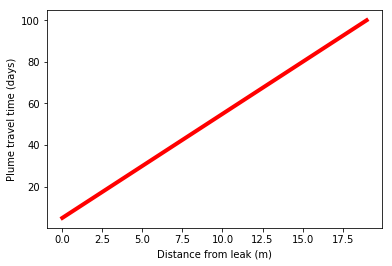

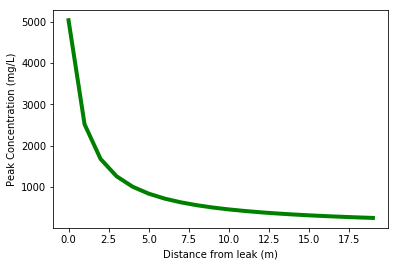

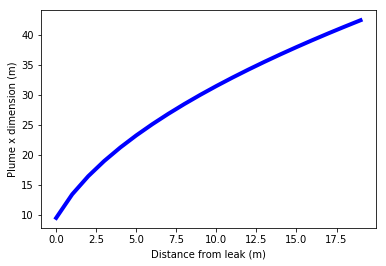

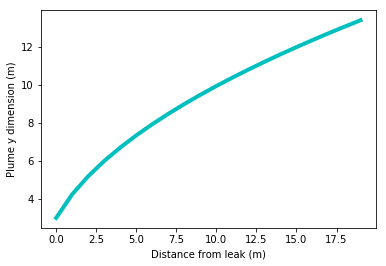

In [6]:
# STEP 8: Plot data
plt.figure(1)
plt.plot(t_out,'r', linewidth=4)
plt.xlabel('Distance from leak (m)')
plt.ylabel('Plume travel time (days)')
plt.show()

plt.figure(2)
plt.plot(Cmax_out,'g', linewidth=4)
plt.xlabel('Distance from leak (m)')
plt.ylabel('Peak Concentration (mg/L)')
plt.show()

plt.figure(3)
plt.plot(sigma3x_out,'b', linewidth=4)
plt.xlabel('Distance from leak (m)')
plt.ylabel('Plume x dimension (m)')
plt.show()

plt.figure(4)
plt.plot(sigma3y_out,'c', linewidth=4)
plt.xlabel('Distance from leak (m)')
plt.ylabel('Plume y dimension (m)')
plt.show()